# Support Vector Regression (SVR)
This notebook implements **SVR** as a nonlinear extension of ordinary least squares. 

The goal is to learn a regression function $f(x)$ that allows a tolerance region (the $\epsilon$-tube) around the predicted curve, while keeping the model as flat as possible. 

SVR provides: 
- A margin-based interpretation of regression
- Robustness to outliers through the $\epsilon$-sensitive loss
- Flexibility via kernel functions

We use scikit-learn's `SVR` implementation.

## SVR Overview
### 1. Objective of SVR
SVR seeks a function of the form 
$$
f(x) = w^T x + b
$$
that satisfies:
- Errors smaller than $\epsilon$ are ignored,
- Errors larger than $\epsilon$ are penalized linearly, 
- The model prefers small $||w||$ to maintain flatness.

### 2. Optimization Form
$$
\min_{w,b,\xi_i,\xi_i^*} \frac{1}{2}\|w\|^2 + C(\xi_i + \xi_i^*)
$$
Subject to:
$$
\begin{aligned}
y_i - w^T x_i - b &\le \varepsilon + \xi_i, \\
w^T x_i + b - y_i &\le \varepsilon + \xi_i^*, \\
\xi_i, \xi_i^* &\ge 0.
\end{aligned}
$$
- $C$: Penalty for violations
- $\varepsilon$: Width of the non-penalized region
### 3. Kernel Trick
SVR can operate in high-dimensional feature spaces via kernels:

- Linear  
- Polynomial  
- RBF  

This makes SVR effective for nonlinear regression.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Dataset Overview: California Housing

We use the **California Housing dataset**, which contains:

- Median home value (target variable)
- Predictors such as median income, house age, population, and geographic features

This dataset is moderately nonlinear, making it suitable for evaluating both linear and RBF-kernel SVR models.


In [3]:
# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Feature names (optional)
feature_names = data.feature_names

X.shape, y.shape

((20640, 8), (20640,))

## Training SVR Models

We train the following models:

- **Linear SVR**  
  Functions similarly to a margin-based linear regression model.

- **RBF SVR**  
  Incorporates smooth nonlinear features via the Gaussian kernel.

We scale the data before training, since SVR is sensitive to the relative magnitudes of features.


In [4]:
# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (very important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Linear kernel SVR
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svr_linear.predict(X_test_scaled)

# Compute MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear

0.5792825614976849

In [6]:
# RBF kernel SVR
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svr_rbf.predict(X_test_scaled)

# Compute MSE
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mse_rbf

0.3313871744739719

## Model Evaluation

We evaluate both models using:

- Mean Squared Error (MSE) on the test set  
- Runtime considerations (SVR can be computationally expensive on large datasets)

This comparison highlights the impact of kernel choice on predictive performance.

In [7]:
print(f"Linear SVR MSE: {mse_linear:.4f}")
print(f"RBF SVR MSE:    {mse_rbf:.4f}")

Linear SVR MSE: 0.5793
RBF SVR MSE:    0.3314


## Visualization of Results

We visualize:

- Predicted vs. true median home values  
- Residual distributions  

These plots illustrate how each model captures the structure of the data.


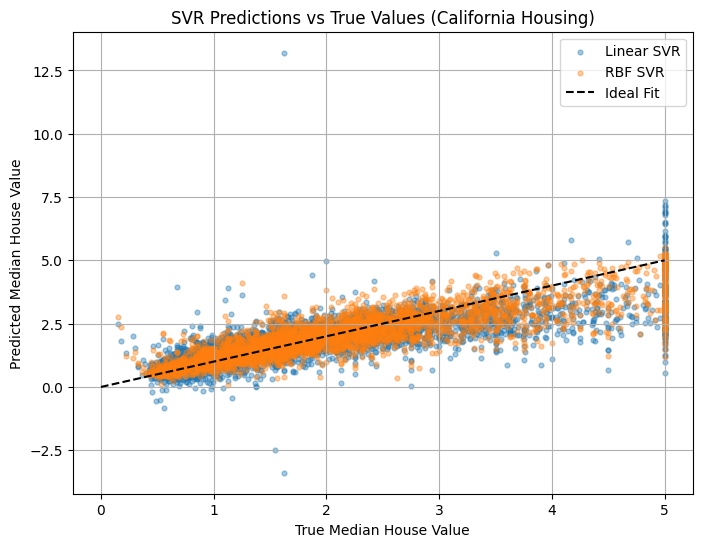

In [8]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_linear, s=12, alpha=0.4, label="Linear SVR")
plt.scatter(y_test, y_pred_rbf, s=12, alpha=0.4, label="RBF SVR")

plt.plot([0, 5], [0, 5], color='black', linestyle='--', label="Ideal Fit")

plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("SVR Predictions vs True Values (California Housing)")
plt.legend()
plt.grid(True)
plt.show()


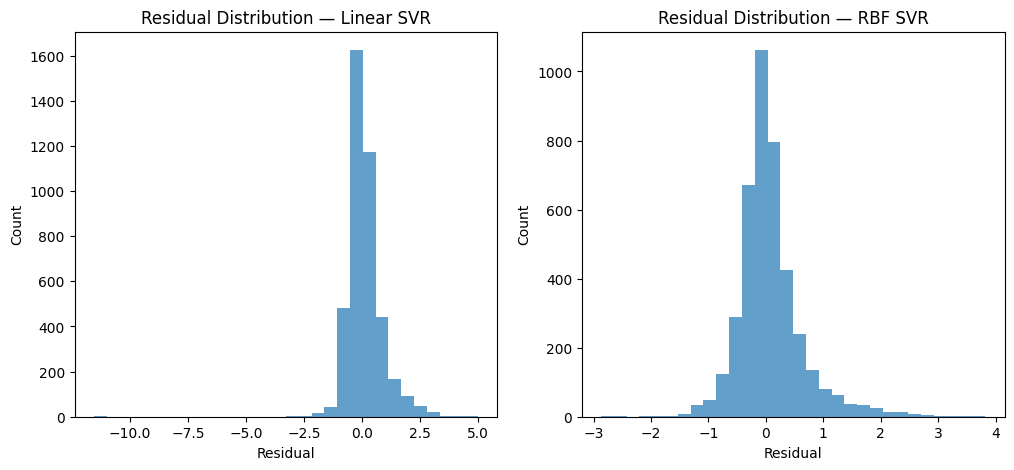

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Linear residuals
axs[0].hist(y_test - y_pred_linear, bins=30, alpha=0.7)
axs[0].set_title("Residual Distribution — Linear SVR")
axs[0].set_xlabel("Residual")
axs[0].set_ylabel("Count")

# RBF residuals
axs[1].hist(y_test - y_pred_rbf, bins=30, alpha=0.7)
axs[1].set_title("Residual Distribution — RBF SVR")
axs[1].set_xlabel("Residual")
axs[1].set_ylabel("Count")
plt.show()


## Results and Discussion

The predicted-vs-true plot shows a clear distinction between the two models. **Linear SVR** forms a broad, compressed band around the diagonal, indicating that its strictly linear form cannot capture the nonlinear relationships present in the housing data. It consistently underestimates high-value homes and overestimates low-value ones, a typical sign of underfitting.

In contrast, the **RBF SVR** predictions cluster more tightly around the ideal diagonal. This reflects its ability to model smooth nonlinear structure through the Gaussian kernel, leading to noticeably improved accuracy across the full target range.

The residual histograms reinforce this behavior. Linear SVR produces wider, more skewed residuals with heavier tails, showing frequent large errors. The RBF model’s residuals are more concentrated near zero and more symmetric, indicating smaller and more consistent deviations.

Overall, **RBF SVR provides a substantially better fit** for this dataset. Its flexibility allows it to respond to complex relationships in the predictors, whereas Linear SVR is limited by its rigid functional form. This comparison clearly highlights why kernel choice is crucial when applying SVR to real-world, nonlinear regression tasks.

